# INTRODUCTION

We try to predict the genetic disorder of patients based on multiple features

# IMPORT & SETUP

In [1]:
from pprint import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# from matplotlib.gridspec import GridSpec
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, LeakyReLU
# from tensorflow.keras.activations import linear, relu, sigmoid
import seaborn as sns

import sklearn
from sklearn import linear_model
from sklearn import ensemble
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, mean_absolute_error, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [200]:
file_path = 'dataset/train.csv'
data = pd.read_csv(file_path)

In [201]:
# remove irrelevant features
columns_to_drop = ['Institute Name', 'Location of Institute', "Father's name", "Parental consent",
                   'Patient First Name', 'Family Name', 'Patient Id']
dataset = data.drop(columns=columns_to_drop).dropna(subset=['Genetic Disorder', 'Disorder Subclass'], how='all')
# Fill missing values in 'Genetic Disorder' based on 'Disorder Subclass'
subclass_to_disorder = {
    'Leber\'s hereditary optic neuropathy': 'Mitochondrial genetic inheritance disorders',
    'Leigh syndrome': 'Mitochondrial genetic inheritance disorders',
    'Mitochondrial myopathy': 'Mitochondrial genetic inheritance disorders',
    'Alzheimer\'s': 'Multifactorial genetic inheritance disorders',
    'Cancer': 'Multifactorial genetic inheritance disorders',
    'Diabetes': 'Multifactorial genetic inheritance disorders',
    'Cystic fibrosis': 'Single-gene inheritance diseases',
    'Hemochromatosis': 'Single-gene inheritance diseases',
    'Tay-Sachs': 'Single-gene inheritance diseases',
}

dataset['Genetic Disorder'] = dataset.apply(
    lambda row: subclass_to_disorder[row['Disorder Subclass']]
    if pd.isna(row['Genetic Disorder']) else row['Genetic Disorder'],
    axis=1
)

dataset = dataset.dropna(subset=['Disorder Subclass'], how='all')

dataset = dataset.loc[:, ['Inherited from father', 'Maternal gene', 'Paternal gene', 'Genes in mother\'s side', 'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5', 'Genetic Disorder', 'Disorder Subclass']]

# CATEGORIAL BINARY
dataset["Genes in mother's side"] = dataset["Genes in mother's side"].replace({'Yes': 1.0, 'No': 0.0})
dataset['Inherited from father'] = dataset['Inherited from father'].replace({'No': 0.0, 'Yes': 1.0})
dataset['Maternal gene'] = dataset['Maternal gene'].replace({'No': 0.0, 'Yes': 1.0})
dataset["Paternal gene"] = dataset["Paternal gene"].replace({'Yes': 1.0, 'No': 0.0})

# dataset = dataset.dropna(subset=['Symptom 4', 'Symptom 5'])
#-------------------------------------------------------%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%--------------------------------#
genetic_disorder_mapping = {
    'Mitochondrial genetic inheritance disorders': 1, 
    'Multifactorial genetic inheritance disorders': 0, 
    'Single-gene inheritance diseases': 2, 
}
dataset['Genetic Disorder'] = dataset['Genetic Disorder'].map(genetic_disorder_mapping)

disorder_subclass_mapping = {
    "Leber's hereditary optic neuropathy":0,  
    'Cystic fibrosis': 1,
    'Diabetes': 2,
    'Leigh syndrome': 3,
    'Tay-Sachs': 4,  
    'Mitochondrial myopathy': 5,
    'Hemochromatosis': 6,
    "Alzheimer's": 7,
    'Cancer':8,  
}

dataset['Disorder Subclass'] = dataset['Disorder Subclass'].map(disorder_subclass_mapping)
heat_data = dataset.copy().dropna()

<AxesSubplot: >

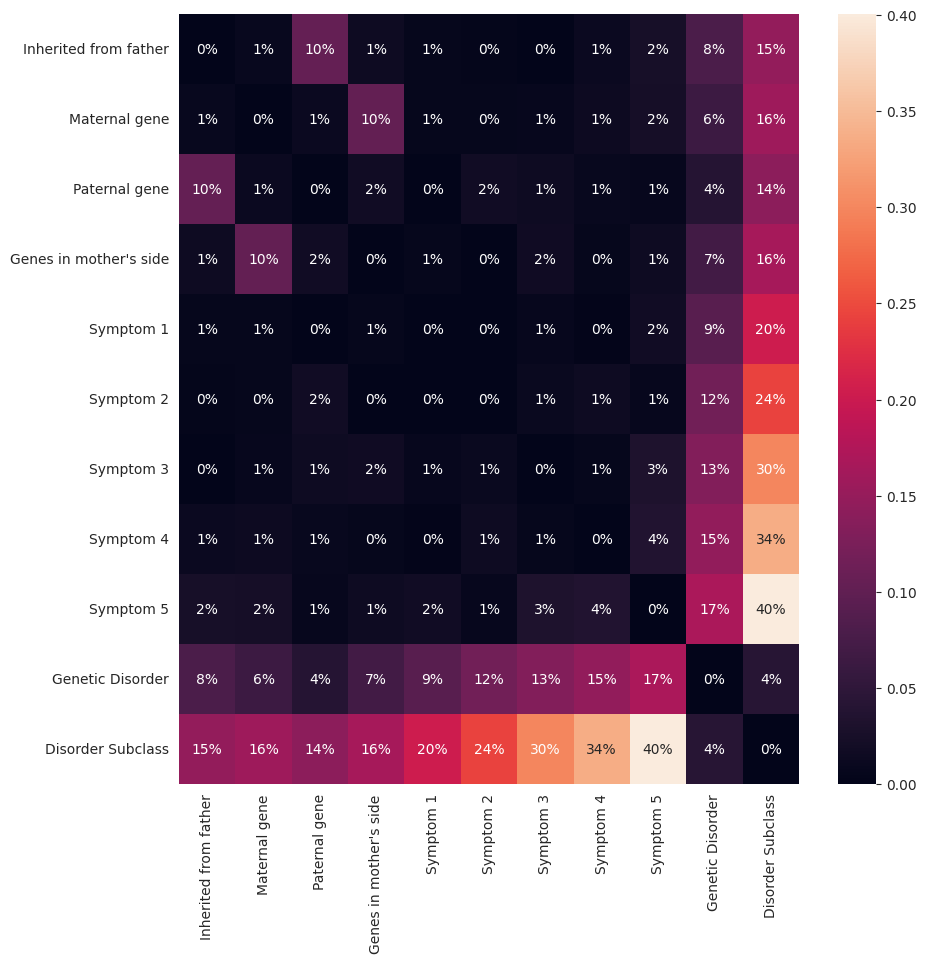

In [202]:
corr = heat_data.corr().applymap(lambda x: 0 if x > 0.99 else abs(x))
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".0%")

In [203]:
X_train, X_test, Y_train, Y_test = train_test_split(heat_data.iloc[:, 0:9 ], heat_data.loc[:, 'Genetic Disorder'], test_size=0.2, random_state=43)

In [204]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, Y_train, Y_test)
models

100%|██████████| 29/29 [00:09<00:00,  3.04it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 27
[LightGBM] [Info] Number of data points in the train set: 9328, number of used features: 9
[LightGBM] [Info] Start training from score -2.248134
[LightGBM] [Info] Start training from score -0.669627
[LightGBM] [Info] Start training from score -0.961015


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.47,0.58,None,0.47,0.01
LGBMClassifier,0.65,0.58,None,0.65,0.13
SVC,0.65,0.58,None,0.64,2.07
ExtraTreeClassifier,0.65,0.57,None,0.64,0.01
ExtraTreesClassifier,0.65,0.57,None,0.64,0.30
LabelPropagation,0.65,0.57,None,0.64,2.01
DecisionTreeClassifier,0.65,0.57,None,0.64,0.01
RandomForestClassifier,0.64,0.57,None,0.64,0.31
LabelSpreading,0.64,0.56,None,0.64,2.66


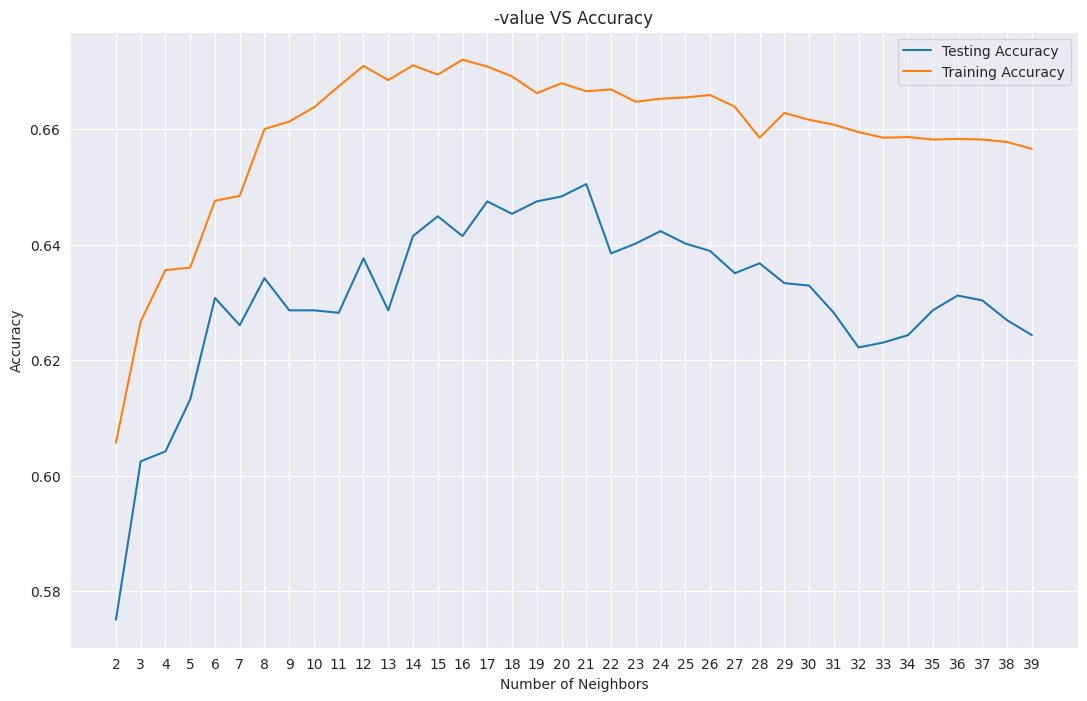

Best accuracy is 0.6505145797598628 with K = 20


In [205]:
neig = np.arange(2, 40)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train, Y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train, Y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, Y_test))

# Plot
plt.figure(figsize=[13, 8])
plt.plot(neig, test_accuracy, label='Testing Accuracy')
plt.plot(neig, train_accuracy, label='Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy), 1 + test_accuracy.index(np.max(test_accuracy))))
